# Q1 - part a

Minimum value: 1.7056127020850405e-05
Optimal point: [1.00412935 1.00828252]


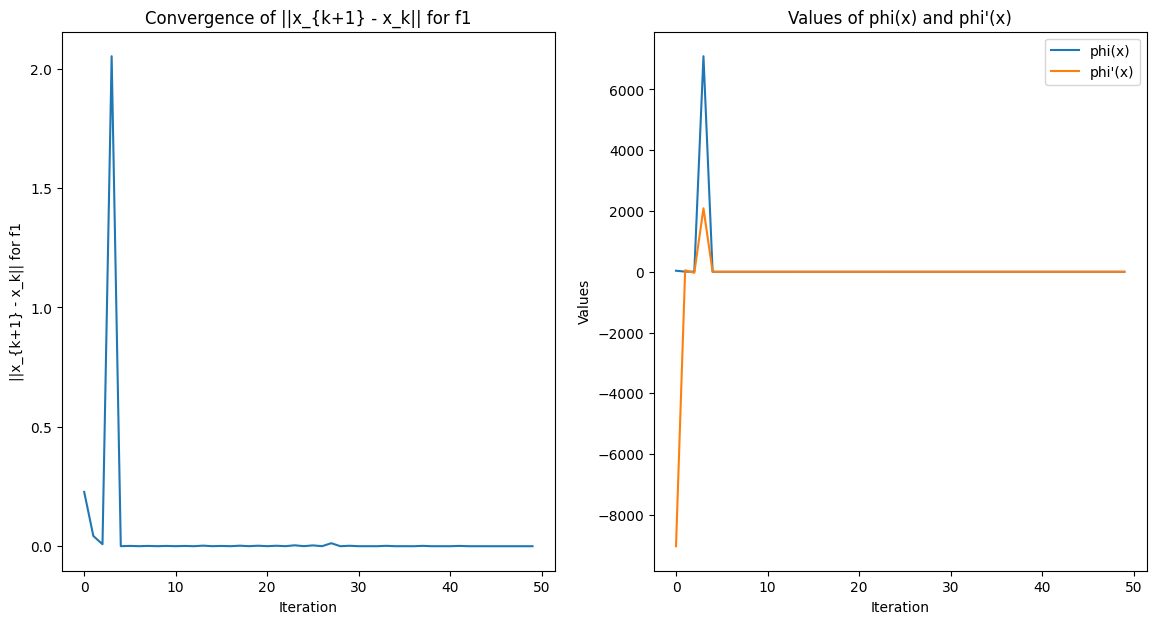

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f1(x) and its gradient
def f1(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

def grad_f1(x):
    x1, x2 = x
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# The ZOOM algorithm
def zoom(f, grad_f, phi, phi_prime, alpha_low, alpha_high, c1, c2):
    while True:
        alpha_j = (alpha_low + alpha_high) / 2  # Simple bisection method for interpolation
        phi_alpha_j = phi(alpha_j)
        if (phi_alpha_j > phi(0) + c1*alpha_j*phi_prime(0)) or (phi_alpha_j >= phi(alpha_low)):
            alpha_high = alpha_j
        else:
            phi_prime_alpha_j = phi_prime(alpha_j)
            if abs(phi_prime_alpha_j) <= -c2*phi_prime(0):
                return alpha_j
            if phi_prime_alpha_j * (alpha_high - alpha_low) >= 0:
                alpha_high = alpha_low
            alpha_low = alpha_j

# The Line Search algorithm
def line_search(f, grad_f, x, c1=1e-4, c2=0.9):
    alpha = 1.0
    alpha_max = 1.0
    alpha_0 = 0
    alpha_1 = alpha
    i = 1

    def phi(a):
        return f(x - a * grad_f(x))

    def phi_prime(a):
        return np.dot(grad_f(x - a * grad_f(x)), -grad_f(x))

    while True:
        if (phi(alpha_1) > phi(0) + c1*alpha_1*phi_prime(0)) or (i > 1 and phi(alpha_1) >= phi(alpha_0)):
            return zoom(f, grad_f, phi, phi_prime, alpha_0, alpha_1, c1, c2)
        phi_prime_alpha_1 = phi_prime(alpha_1)
        if abs(phi_prime_alpha_1) <= -c2*phi_prime(0):
            return alpha_1
        if phi_prime_alpha_1 >= 0:
            return zoom(f, grad_f, phi, phi_prime, alpha_1, alpha_0, c1, c2)
        alpha_0 = alpha_1
        alpha_1 = (alpha_1 + alpha_max) / 2
        i += 1

# Gradient descent algorithm with Line Search for step length
def gradient_descent_with_line_search(f, grad_f, x0, max_iterations=1000, tolerance=1e-5):
    x = x0
    iteration = 0
    x_diff_norm = []
    f_x = []
    phi_values = []
    phi_prime_values = []
    num_func_evaluations = 0
    num_grad_evaluations = 0

    while iteration <= max_iterations:
        grad = grad_f(x)
        num_grad_evaluations += 1  # Increment gradient evaluation
        alpha = line_search(f, grad_f, x)
        x_new = x - alpha * grad
        x_diff_norm.append(np.linalg.norm(x_new - x))
        f_x.append(f(x_new))
        phi_values.append(f(x_new - alpha * grad))
        phi_prime_values.append(np.dot(grad_f(x_new - alpha * grad), -grad_f(x_new)))
        num_func_evaluations += 2  # Increment function evaluations for phi and phi'
        if np.linalg.norm(grad) < tolerance:
            break
        x = x_new
        iteration += 1

    return x, x_diff_norm, f_x, phi_values, phi_prime_values, num_func_evaluations, num_grad_evaluations

# Initial point
x0_f1 = np.array([-1.2, 1.0])

# Run the gradient descent with line search on the function f1
result_f1, x_diff_norm_f1, f_x_f1, phi_values_f1, phi_prime_values_f1, num_func_evaluations_f1, num_grad_evaluations_f1 = gradient_descent_with_line_search(f1, grad_f1, x0_f1, max_iterations=400)

# Print the minimum value and the optimal points
print("Minimum value:", f1(result_f1))
print("Optimal point:", result_f1)

# Plot convergence graphs for f1
plt.figure(figsize=(14, 7))

# Plot ||x_{k+1} - x_k|| for f1
plt.subplot(1, 2, 1)
plt.plot(x_diff_norm_f1[:50])  # Plotting from iteration 0 to 400
plt.xlabel('Iteration')
plt.ylabel('||x_{k+1} - x_k|| for f1')
plt.title('Convergence of ||x_{k+1} - x_k|| for f1')

# Plot phi(x) and phi'(x)
plt.subplot(1, 2, 2)
plt.plot(phi_values_f1[:50], label='phi(x)')  # Plotting from iteration 0 to 400
plt.plot(phi_prime_values_f1[:50], label="phi'(x)")  # Plotting from iteration 0 to 400
plt.xlabel('Iteration')
plt.ylabel('Values')
plt.title("Values of phi(x) and phi'(x)")
plt.legend()

plt.show()


Minimum value: 1.7056127020850405e-05
Optimal point: [1.00412935 1.00828252]


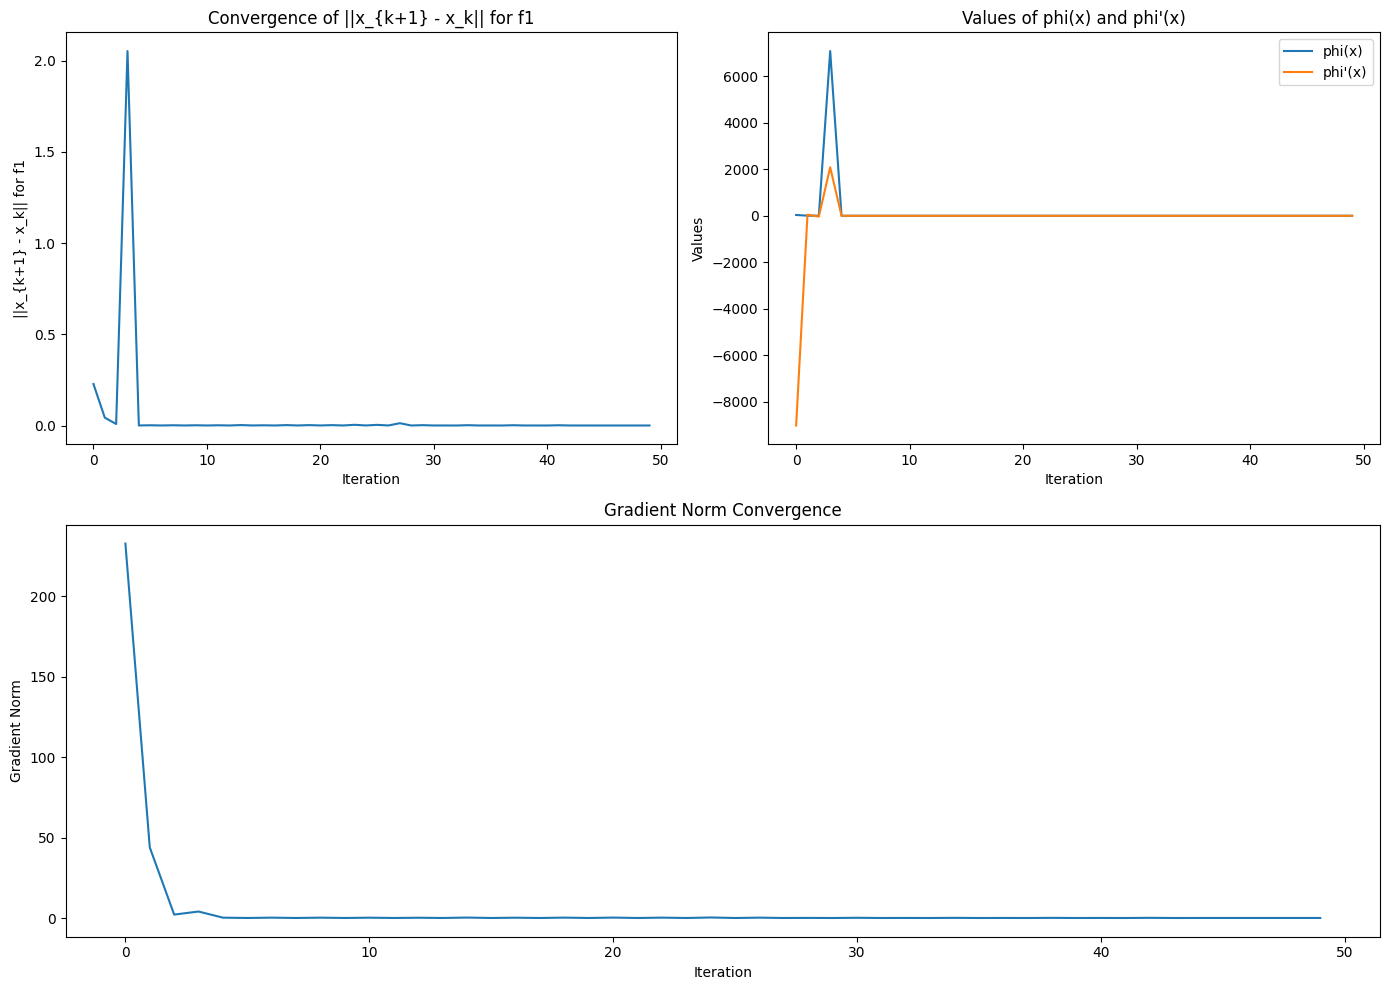

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f1(x) and its gradient
def f1(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

def grad_f1(x):
    x1, x2 = x
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# The ZOOM algorithm
def zoom(f, grad_f, phi, phi_prime, alpha_low, alpha_high, c1, c2):
    while True:
        alpha_j = (alpha_low + alpha_high) / 2  # Simple bisection method for interpolation
        phi_alpha_j = phi(alpha_j)
        if (phi_alpha_j > phi(0) + c1*alpha_j*phi_prime(0)) or (phi_alpha_j >= phi(alpha_low)):
            alpha_high = alpha_j
        else:
            phi_prime_alpha_j = phi_prime(alpha_j)
            if abs(phi_prime_alpha_j) <= -c2*phi_prime(0):
                return alpha_j
            if phi_prime_alpha_j * (alpha_high - alpha_low) >= 0:
                alpha_high = alpha_low
            alpha_low = alpha_j

# The Line Search algorithm
def line_search(f, grad_f, x, c1=1e-4, c2=0.9):
    alpha = 1.0
    alpha_max = 1.0
    alpha_0 = 0
    alpha_1 = alpha
    i = 1

    def phi(a):
        return f(x - a * grad_f(x))

    def phi_prime(a):
        return np.dot(grad_f(x - a * grad_f(x)), -grad_f(x))

    while True:
        if (phi(alpha_1) > phi(0) + c1*alpha_1*phi_prime(0)) or (i > 1 and phi(alpha_1) >= phi(alpha_0)):
            return zoom(f, grad_f, phi, phi_prime, alpha_0, alpha_1, c1, c2)
        phi_prime_alpha_1 = phi_prime(alpha_1)
        if abs(phi_prime_alpha_1) <= -c2*phi_prime(0):
            return alpha_1
        if phi_prime_alpha_1 >= 0:
            return zoom(f, grad_f, phi, phi_prime, alpha_1, alpha_0, c1, c2)
        alpha_0 = alpha_1
        alpha_1 = (alpha_1 + alpha_max) / 2
        i += 1

# Gradient descent algorithm with Line Search for step length
def gradient_descent_with_line_search(f, grad_f, x0, max_iterations=1000, tolerance=1e-5):
    x = x0
    iteration = 0
    x_diff_norm = []
    f_x = []
    phi_values = []
    phi_prime_values = []
    grad_norms = []  # For storing gradient norms
    num_func_evaluations = 0
    num_grad_evaluations = 0

    while iteration <= max_iterations:
        grad = grad_f(x)
        num_grad_evaluations += 1  # Increment gradient evaluation
        grad_norms.append(np.linalg.norm(grad))  # Store gradient norm
        alpha = line_search(f, grad_f, x)
        x_new = x - alpha * grad
        x_diff_norm.append(np.linalg.norm(x_new - x))
        f_x.append(f(x_new))
        phi_values.append(f(x_new - alpha * grad))
        phi_prime_values.append(np.dot(grad_f(x_new - alpha * grad), -grad_f(x_new)))
        num_func_evaluations += 2  # Increment function evaluations for phi and phi'
        if np.linalg.norm(grad) < tolerance:
            break
        x = x_new
        iteration += 1

    return x, x_diff_norm, f_x, phi_values, phi_prime_values, grad_norms, num_func_evaluations, num_grad_evaluations

# Initial point
x0_f1 = np.array([-1.2, 1.0])

# Run the gradient descent with line search on the function f1
result_f1, x_diff_norm_f1, f_x_f1, phi_values_f1, phi_prime_values_f1, grad_norms_f1, num_func_evaluations_f1, num_grad_evaluations_f1 = gradient_descent_with_line_search(f1, grad_f1, x0_f1, max_iterations=400)

# Print the minimum value and the optimal points
print("Minimum value:", f1(result_f1))
print("Optimal point:", result_f1)

# Plot convergence graphs for f1
plt.figure(figsize=(14, 10))

# Plot ||x_{k+1} - x_k|| for f1
plt.subplot(2, 2, 1)
plt.plot(x_diff_norm_f1[:50])  # Plotting from iteration 0 to 400
plt.xlabel('Iteration')
plt.ylabel('||x_{k+1} - x_k|| for f1')
plt.title('Convergence of ||x_{k+1} - x_k|| for f1')

# Plot phi(x) and phi'(x)
plt.subplot(2, 2, 2)
plt.plot(phi_values_f1[:50], label='phi(x)')  # Plotting from iteration 0 to 400
plt.plot(phi_prime_values_f1[:50], label="phi'(x)")  # Plotting from iteration 0 to 400
plt.xlabel('Iteration')
plt.ylabel('Values')
plt.title("Values of phi(x) and phi'(x)")
plt.legend()

# Plot gradient norms
plt.subplot(2, 1, 2)
plt.plot(grad_norms_f1[:50])
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm Convergence')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Number of iterations: 401
Minimum value: 1.7056127020850405e-05
Optimal point: [1.00412935 1.00828252]


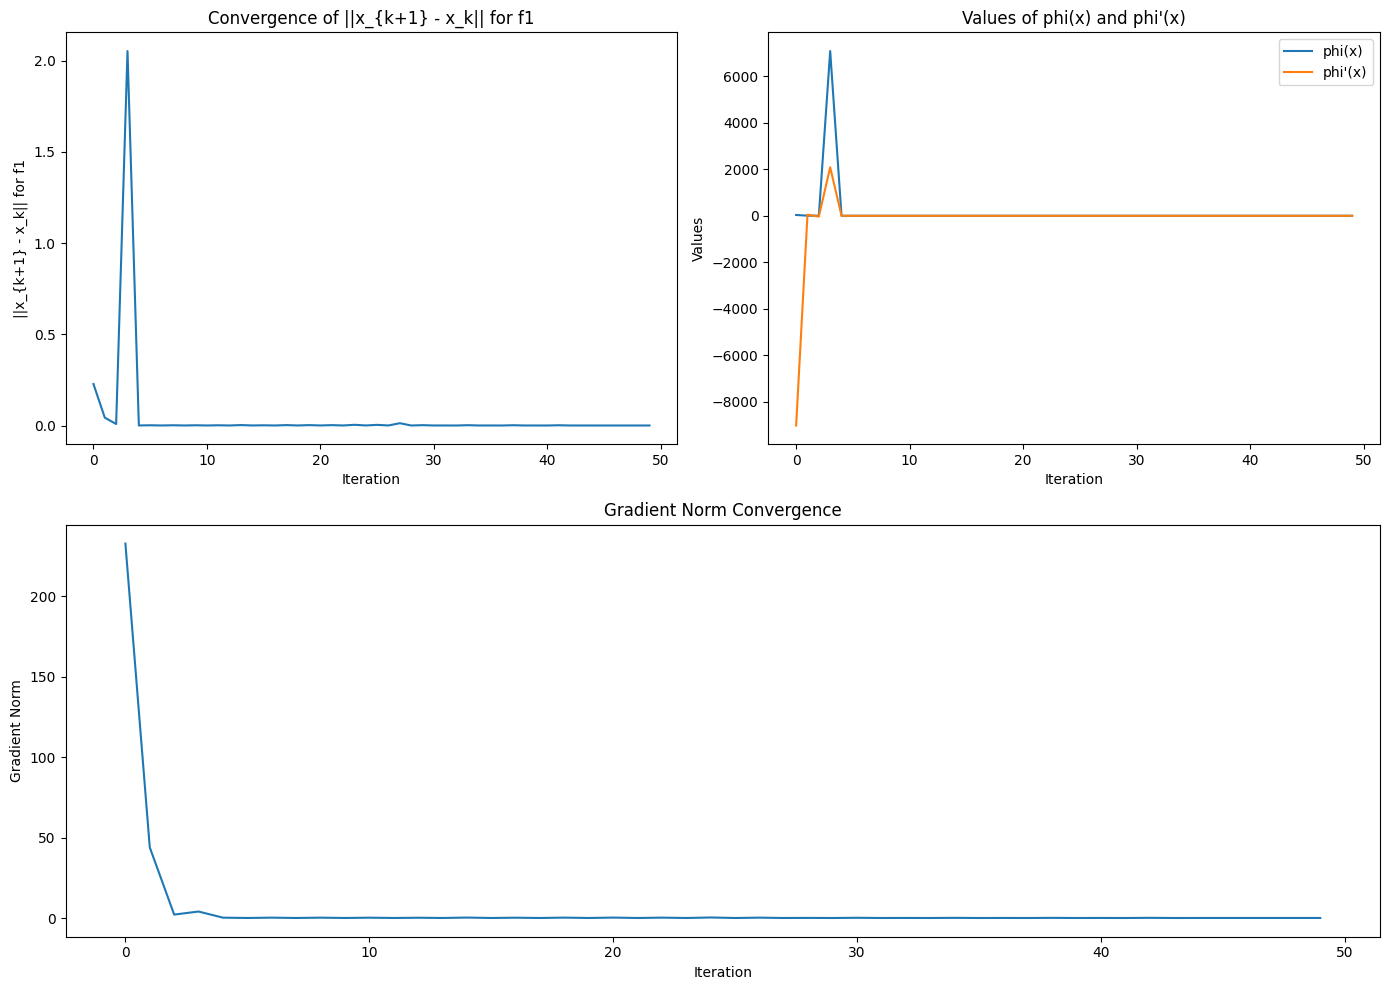

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f1(x) and its gradient
def f1(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

def grad_f1(x):
    x1, x2 = x
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])


# Gradient descent algorithm with Line Search for step length
def gradient_descent_with_line_search(f, grad_f, x0, max_iterations=1000, tolerance=1e-5):
    x = x0
    iteration = 0
    x_diff_norm = []
    f_x = []
    phi_values = []
    phi_prime_values = []
    grad_norms = []  # For storing gradient norms
    num_func_evaluations = 0
    num_grad_evaluations = 0

    while iteration <= max_iterations:
        grad = grad_f(x)
        num_grad_evaluations += 1  # Increment gradient evaluation
        grad_norms.append(np.linalg.norm(grad))  # Store gradient norm
        alpha = line_search(f, grad_f, x)
        x_new = x - alpha * grad
        x_diff_norm.append(np.linalg.norm(x_new - x))
        f_x.append(f(x_new))
        phi_values.append(f(x_new - alpha * grad))
        phi_prime_values.append(np.dot(grad_f(x_new - alpha * grad), -grad_f(x_new)))
        num_func_evaluations += 2  # Increment function evaluations for phi and phi'
        if np.linalg.norm(grad) < tolerance:
            break
        x = x_new
        iteration += 1

    return x, x_diff_norm, f_x, phi_values, phi_prime_values, grad_norms, num_func_evaluations, num_grad_evaluations, iteration

# Initial point
x0_f1 = np.array([-1.2, 1.0])

# Run the gradient descent with line search on the function f1
result_f1, x_diff_norm_f1, f_x_f1, phi_values_f1, phi_prime_values_f1, grad_norms_f1, num_func_evaluations_f1, num_grad_evaluations_f1, num_iterations = gradient_descent_with_line_search(f1, grad_f1, x0_f1, max_iterations=400)

# Print the number of iterations
print("Number of iterations:", num_iterations)

# Print the minimum value and the optimal points
print("Minimum value:", f1(result_f1))
print("Optimal point:", result_f1)

# Plot convergence graphs for f1
plt.figure(figsize=(14, 10))

# Plot ||x_{k+1} - x_k|| for f1
plt.subplot(2, 2, 1)
plt.plot(x_diff_norm_f1[:50])  # Plotting from iteration 0 to 400
plt.xlabel('Iteration')
plt.ylabel('||x_{k+1} - x_k|| for f1')
plt.title('Convergence of ||x_{k+1} - x_k|| for f1')

# Plot phi(x) and phi'(x)
plt.subplot(2, 2, 2)
plt.plot(phi_values_f1[:50], label='phi(x)')  # Plotting from iteration 0 to 400
plt.plot(phi_prime_values_f1[:50], label="phi'(x)")  # Plotting from iteration 0 to 400
plt.xlabel('Iteration')
plt.ylabel('Values')
plt.title("Values of phi(x) and phi'(x)")
plt.legend()

# Plot gradient norms
plt.subplot(2, 1, 2)
plt.plot(grad_norms_f1[:50])
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm Convergence')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Q1 - part b

Minimum value: 0.0003020913599615727
Optimal point: [0.12228377 0.01221903 0.06566801 0.06669428]
Number of function evaluations: 2004
Number of gradient evaluations: 1002


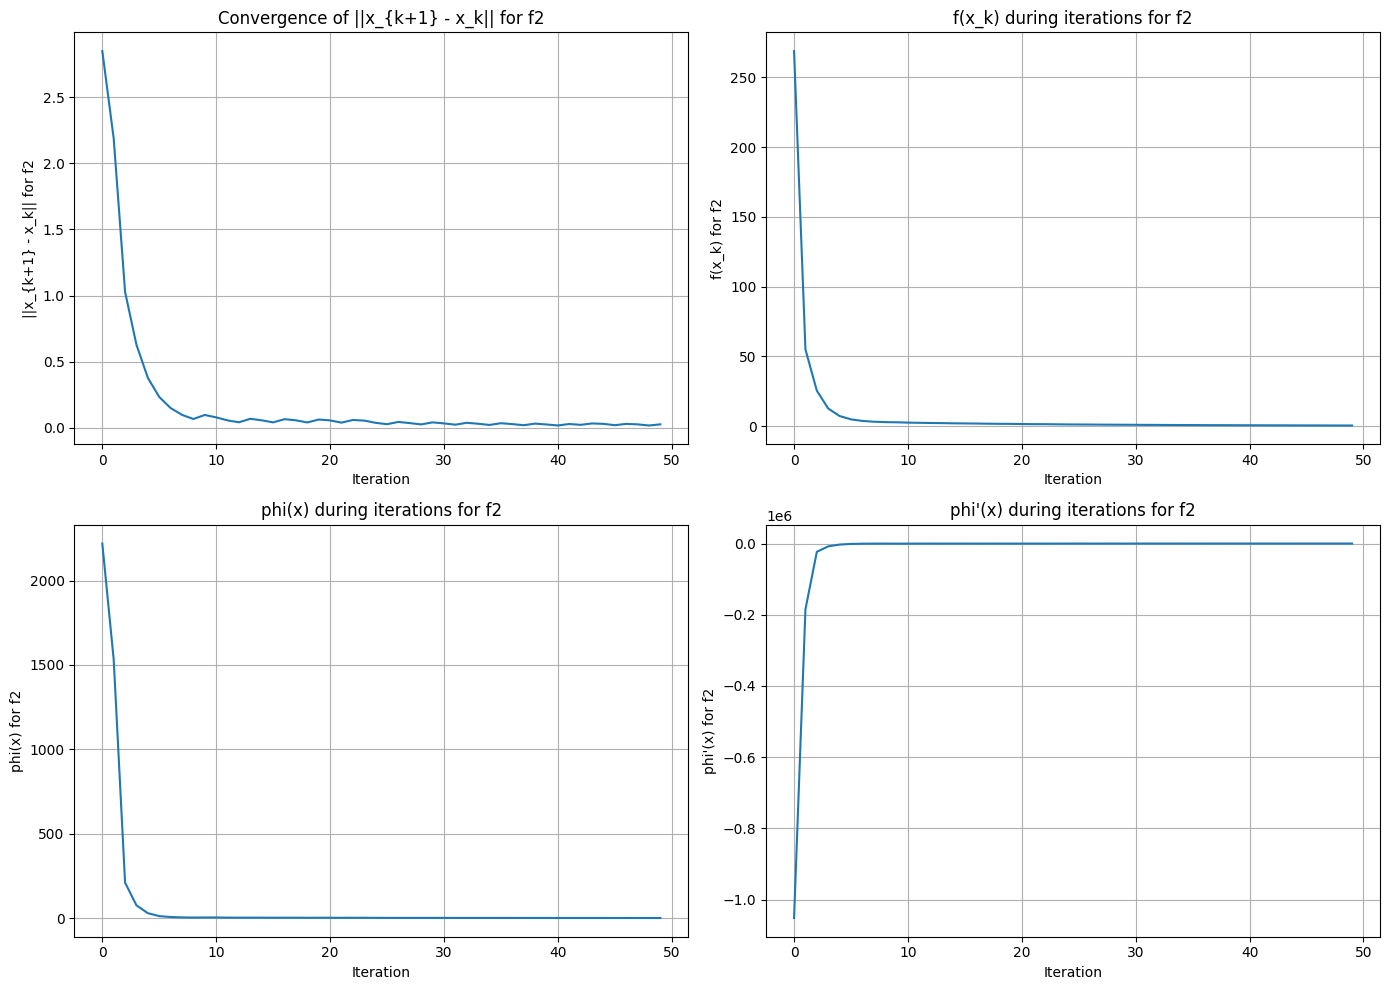

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f2(x) and its gradient
def f2(x):
    x1, x2, x3, x4 = x
    return (x1 - 10*x2)**2 + 5*(x3 - x4)**2 + (x2 - 2*x3)**4 + 10*(x1 - x4)**4

def grad_f2(x):
    x1, x2, x3, x4 = x
    df_dx1 = 2*(x1 - 10*x2) + 40*(x1 - x4)**3
    df_dx2 = -20*(x1 - 10*x2) + 4*(x2 - 2*x3)**3
    df_dx3 = 10*(x3 - x4) - 8*(x2 - 2*x3)**3
    df_dx4 = -10*(x3 - x4) - 40*(x1 - x4)**3
    return np.array([df_dx1, df_dx2, df_dx3, df_dx4])

# The ZOOM procedure from the provided image
def zoom(f, grad_f, phi, phi_prime, alpha_low, alpha_high, c1, c2):
    while True:
        alpha_j = (alpha_low + alpha_high) / 2  # Simple bisection method for interpolation
        phi_alpha_j = phi(alpha_j)
        if (phi_alpha_j > phi(0) + c1*alpha_j*phi_prime(0)) or (phi_alpha_j >= phi(alpha_low)):
            alpha_high = alpha_j
        else:
            phi_prime_alpha_j = phi_prime(alpha_j)
            if abs(phi_prime_alpha_j) <= -c2*phi_prime(0):
                return alpha_j
            if phi_prime_alpha_j * (alpha_high - alpha_low) >= 0:
                alpha_high = alpha_low
            alpha_low = alpha_j

# The Line Search algorithm from the provided image
def line_search(f, grad_f, x, c1=1e-4, c2=0.9):
    alpha = 1.0
    alpha_max = 1.0
    alpha_0 = 0
    alpha_1 = alpha
    i = 1

    def phi(a):
        return f(x - a * grad_f(x))

    def phi_prime(a):
        return np.dot(grad_f(x - a * grad_f(x)), -grad_f(x))

    while True:
        if (phi(alpha_1) > phi(0) + c1*alpha_1*phi_prime(0)) or (i > 1 and phi(alpha_1) >= phi(alpha_0)):
            return zoom(f, grad_f, phi, phi_prime, alpha_0, alpha_1, c1, c2)
        phi_prime_alpha_1 = phi_prime(alpha_1)
        if abs(phi_prime_alpha_1) <= -c2*phi_prime(0):
            return alpha_1
        if phi_prime_alpha_1 >= 0:
            return zoom(f, grad_f, phi, phi_prime, alpha_1, alpha_0, c1, c2)
        alpha_0 = alpha_1
        alpha_1 = (alpha_1 + alpha_max) / 2
        i += 1

# Gradient descent algorithm with Line Search for step length
def gradient_descent_with_line_search(f, grad_f, x0, tolerance=1e-5, max_iterations=1000):
    x = x0
    iteration = 0
    x_diff_norm = []
    f_x = []
    phi_values = []
    phi_prime_values = []
    num_func_evaluations = 0
    num_grad_evaluations = 0

    while True:
        grad = grad_f(x)
        num_grad_evaluations += 1  # Increment gradient evaluation
        alpha = line_search(f, grad_f, x)
        x_new = x - alpha * grad
        x_diff_norm.append(np.linalg.norm(x_new - x))
        f_x.append(f(x_new))
        phi_values.append(f(x_new - alpha * grad))
        phi_prime_values.append(np.dot(grad_f(x_new - alpha * grad), -grad_f(x_new)))
        num_func_evaluations += 2  # Increment function evaluations for phi and phi'
        if np.linalg.norm(grad) < tolerance or iteration > max_iterations:
            break
        x = x_new
        iteration += 1

    return x, x_diff_norm, f_x, phi_values, phi_prime_values, num_func_evaluations, num_grad_evaluations

# Initial point
x0_f2 = np.array([1, 2, 2, 2])

# Run the gradient descent with line search on the function f2
result_f2, x_diff_norm_f2, f_x_f2, phi_values_f2, phi_prime_values_f2, num_func_evaluations_f2, num_grad_evaluations_f2 = gradient_descent_with_line_search(f2, grad_f2, x0_f2)

# Print the minimum value and the optimal points
print("Minimum value:", f2(result_f2))
print("Optimal point:", result_f2)
print("Number of function evaluations:", num_func_evaluations_f2)
print("Number of gradient evaluations:", num_grad_evaluations_f2)

# Plot convergence graphs for f2
plt.figure(figsize=(14, 10))

# Plot ||x_{k+1} - x_k|| for f2
plt.subplot(2, 2, 1)
plt.plot(x_diff_norm_f2[:50])  # Limit to the first 50 iterations
plt.xlabel('Iteration')
plt.ylabel('||x_{k+1} - x_k|| for f2')
plt.title('Convergence of ||x_{k+1} - x_k|| for f2')
plt.grid(True)

# Plot f(x_k) for f2
plt.subplot(2, 2, 2)
plt.plot(f_x_f2[:50])  # Limit to the first 50 iterations
plt.xlabel('Iteration')
plt.ylabel('f(x_k) for f2')
plt.title('f(x_k) during iterations for f2')
plt.grid(True)

# Plot phi(x) for f2
plt.subplot(2, 2, 3)
plt.plot(phi_values_f2[:50])  # Limit to the first 50 iterations
plt.xlabel('Iteration')
plt.ylabel('phi(x) for f2')
plt.title('phi(x) during iterations for f2')
plt.grid(True)

# Plot phi'(x) for f2
plt.subplot(2, 2, 4)
plt.plot(phi_prime_values_f2[:50])  # Limit to the first 50 iterations
plt.xlabel('Iteration')
plt.ylabel("phi'(x) for f2")
plt.title("phi'(x) during iterations for f2")
plt.grid(True)

plt.tight_layout()
plt.show()


Minimum value: 0.0003020913599615727
Optimal point: [0.12228377 0.01221903 0.06566801 0.06669428]
Number of function evaluations: 2004
Number of gradient evaluations: 1002


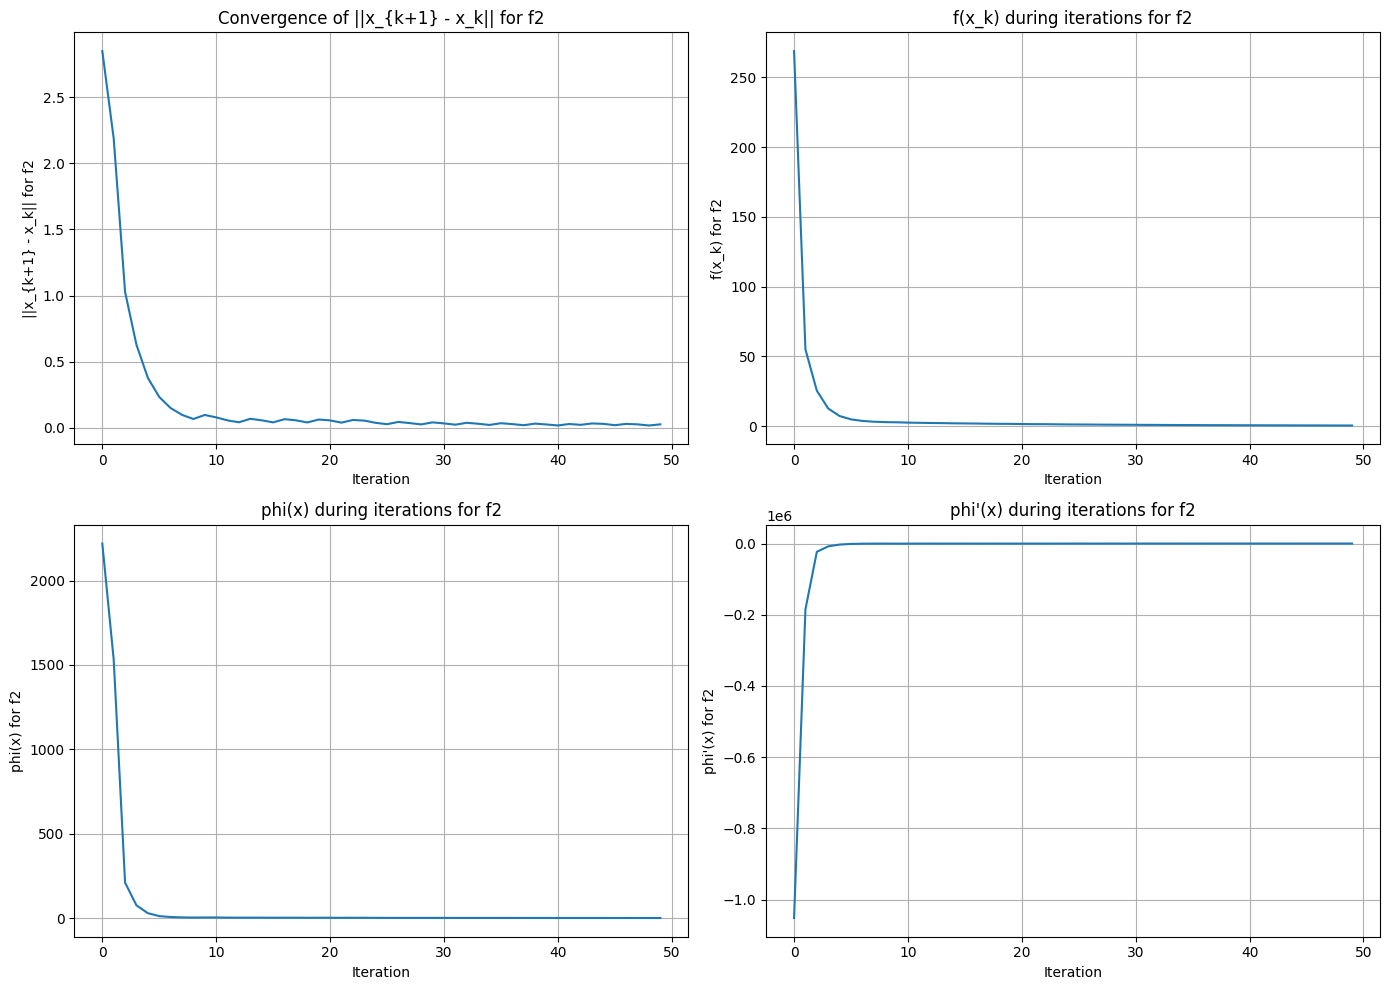

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f2(x) and its gradient
def f2(x):
    x1, x2, x3, x4 = x
    return (x1 - 10*x2)**2 + 5*(x3 - x4)**2 + (x2 - 2*x3)**4 + 10*(x1 - x4)**4

def grad_f2(x):
    x1, x2, x3, x4 = x
    df_dx1 = 2*(x1 - 10*x2) + 40*(x1 - x4)**3
    df_dx2 = -20*(x1 - 10*x2) + 4*(x2 - 2*x3)**3
    df_dx3 = 10*(x3 - x4) - 8*(x2 - 2*x3)**3
    df_dx4 = -10*(x3 - x4) - 40*(x1 - x4)**3
    return np.array([df_dx1, df_dx2, df_dx3, df_dx4])

# The ZOOM procedure from the provided image
def zoom(f, grad_f, phi, phi_prime, alpha_low, alpha_high, c1, c2):
    while True:
        alpha_j = (alpha_low + alpha_high) / 2  # Simple bisection method for interpolation
        phi_alpha_j = phi(alpha_j)
        if (phi_alpha_j > phi(0) + c1*alpha_j*phi_prime(0)) or (phi_alpha_j >= phi(alpha_low)):
            alpha_high = alpha_j
        else:
            phi_prime_alpha_j = phi_prime(alpha_j)
            if abs(phi_prime_alpha_j) <= -c2*phi_prime(0):
                return alpha_j
            if phi_prime_alpha_j * (alpha_high - alpha_low) >= 0:
                alpha_high = alpha_low
            alpha_low = alpha_j

# The Line Search algorithm from the provided image
def line_search(f, grad_f, x, c1=1e-4, c2=0.9):
    alpha = 1.0
    alpha_max = 1.0
    alpha_0 = 0
    alpha_1 = alpha
    i = 1

    def phi(a):
        return f(x - a * grad_f(x))

    def phi_prime(a):
        return np.dot(grad_f(x - a * grad_f(x)), -grad_f(x))

    while True:
        if (phi(alpha_1) > phi(0) + c1*alpha_1*phi_prime(0)) or (i > 1 and phi(alpha_1) >= phi(alpha_0)):
            return zoom(f, grad_f, phi, phi_prime, alpha_0, alpha_1, c1, c2)
        phi_prime_alpha_1 = phi_prime(alpha_1)
        if abs(phi_prime_alpha_1) <= -c2*phi_prime(0):
            return alpha_1
        if phi_prime_alpha_1 >= 0:
            return zoom(f, grad_f, phi, phi_prime, alpha_1, alpha_0, c1, c2)
        alpha_0 = alpha_1
        alpha_1 = (alpha_1 + alpha_max) / 2
        i += 1

# Gradient descent algorithm with Line Search for step length
def gradient_descent_with_line_search(f, grad_f, x0, tolerance=1e-5, max_iterations=1000):
    x = x0
    iteration = 0
    x_diff_norm = []
    f_x = []
    phi_values = []
    phi_prime_values = []
    num_func_evaluations = 0
    num_grad_evaluations = 0

    while True:
        grad = grad_f(x)
        num_grad_evaluations += 1  # Increment gradient evaluation
        alpha = line_search(f, grad_f, x)
        x_new = x - alpha * grad
        x_diff_norm.append(np.linalg.norm(x_new - x))
        f_x.append(f(x_new))
        phi_values.append(f(x_new - alpha * grad))
        phi_prime_values.append(np.dot(grad_f(x_new - alpha * grad), -grad_f(x_new)))
        num_func_evaluations += 2  # Increment function evaluations for phi and phi'
        if np.linalg.norm(grad) < tolerance or iteration > max_iterations:
            break
        x = x_new
        iteration += 1

    return x, x_diff_norm, f_x, phi_values, phi_prime_values, num_func_evaluations, num_grad_evaluations

# Initial point
x0_f2 = np.array([1, 2, 2, 2])

# Run the gradient descent with line search on the function f2
result_f2, x_diff_norm_f2, f_x_f2, phi_values_f2, phi_prime_values_f2, num_func_evaluations_f2, num_grad_evaluations_f2 = gradient_descent_with_line_search(f2, grad_f2, x0_f2)

# Print the minimum value and the optimal points
print("Minimum value:", f2(result_f2))
print("Optimal point:", result_f2)
print("Number of function evaluations:", num_func_evaluations_f2)
print("Number of gradient evaluations:", num_grad_evaluations_f2)

# Plot convergence graphs for f2
plt.figure(figsize=(14, 10))

# Plot ||x_{k+1} - x_k|| for f2
plt.subplot(2, 2, 1)
plt.plot(x_diff_norm_f2[:50])  # Limit to the first 50 iterations
plt.xlabel('Iteration')
plt.ylabel('||x_{k+1} - x_k|| for f2')
plt.title('Convergence of ||x_{k+1} - x_k|| for f2')
plt.grid(True)

# Plot f(x_k) for f2
plt.subplot(2, 2, 2)
plt.plot(f_x_f2[:50])  # Limit to the first 50 iterations
plt.xlabel('Iteration')
plt.ylabel('f(x_k) for f2')
plt.title('f(x_k) during iterations for f2')
plt.grid(True)

# Plot phi(x) for f2
plt.subplot(2, 2, 3)
plt.plot(phi_values_f2[:50])  # Limit to the first 50 iterations
plt.xlabel('Iteration')
plt.ylabel('phi(x) for f2')
plt.title('phi(x) during iterations for f2')
plt.grid(True)

# Plot phi'(x) for f2
plt.subplot(2, 2, 4)
plt.plot(phi_prime_values_f2[:50])  # Limit to the first 50 iterations
plt.xlabel('Iteration')
plt.ylabel("phi'(x) for f2")
plt.title("phi'(x) during iterations for f2")
plt.grid(True)

plt.tight_layout()
plt.show()


Number of iterations: 401
Minimum value: 0.0024470579264218037
Optimal point: [0.20786977 0.02067458 0.11002679 0.11488506]


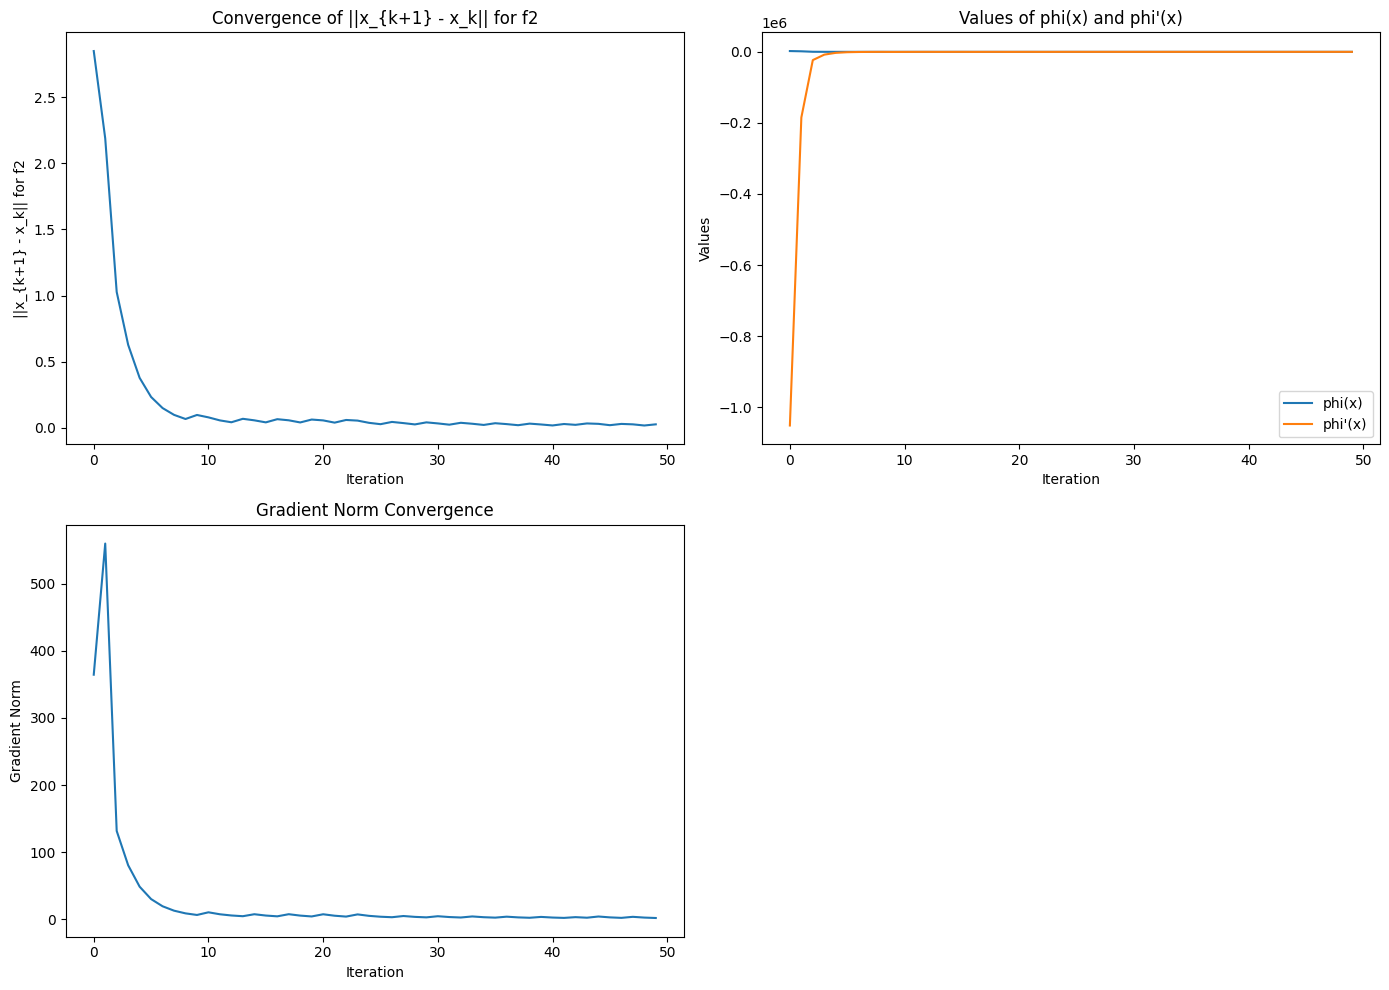

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f2(x) and its gradient
def f2(x):
    x1, x2, x3, x4 = x
    return (x1 - 10*x2)**2 + 5*(x3 - x4)**2 + (x2 - 2*x3)**4 + 10*(x1 - x4)**4

def grad_f2(x):
    x1, x2, x3, x4 = x
    df_dx1 = 2*(x1 - 10*x2) + 40*(x1 - x4)**3
    df_dx2 = -20*(x1 - 10*x2) + 4*(x2 - 2*x3)**3
    df_dx3 = 10*(x3 - x4) - 8*(x2 - 2*x3)**3
    df_dx4 = -10*(x3 - x4) - 40*(x1 - x4)**3
    return np.array([df_dx1, df_dx2, df_dx3, df_dx4])

# The ZOOM algorithm
def zoom(f, grad_f, phi, phi_prime, alpha_low, alpha_high, c1, c2):
    while True:
        alpha_j = (alpha_low + alpha_high) / 2  # Simple bisection method for interpolation
        phi_alpha_j = phi(alpha_j)
        if (phi_alpha_j > phi(0) + c1*alpha_j*phi_prime(0)) or (phi_alpha_j >= phi(alpha_low)):
            alpha_high = alpha_j
        else:
            phi_prime_alpha_j = phi_prime(alpha_j)
            if abs(phi_prime_alpha_j) <= -c2*phi_prime(0):
                return alpha_j
            if phi_prime_alpha_j * (alpha_high - alpha_low) >= 0:
                alpha_high = alpha_low
            alpha_low = alpha_j

# The Line Search algorithm
def line_search(f, grad_f, x, c1=1e-4, c2=0.9):
    alpha = 1.0
    alpha_max = 1.0
    alpha_0 = 0
    alpha_1 = alpha
    i = 1

    def phi(a):
        return f(x - a * grad_f(x))

    def phi_prime(a):
        return np.dot(grad_f(x - a * grad_f(x)), -grad_f(x))

    while True:
        if (phi(alpha_1) > phi(0) + c1*alpha_1*phi_prime(0)) or (i > 1 and phi(alpha_1) >= phi(alpha_0)):
            return zoom(f, grad_f, phi, phi_prime, alpha_0, alpha_1, c1, c2)
        phi_prime_alpha_1 = phi_prime(alpha_1)
        if abs(phi_prime_alpha_1) <= -c2*phi_prime(0):
            return alpha_1
        if phi_prime_alpha_1 >= 0:
            return zoom(f, grad_f, phi, phi_prime, alpha_1, alpha_0, c1, c2)
        alpha_0 = alpha_1
        alpha_1 = (alpha_1 + alpha_max) / 2
        i += 1

# Gradient descent algorithm with Line Search for step length
def gradient_descent_with_line_search(f, grad_f, x0, max_iterations=1000, tolerance=1e-5):
    x = x0
    iteration = 0
    x_diff_norm = []
    f_x = []
    phi_values = []
    phi_prime_values = []
    grad_norms = []  # For storing gradient norms
    num_func_evaluations = 0
    num_grad_evaluations = 0

    while iteration <= max_iterations:
        grad = grad_f(x)
        num_grad_evaluations += 1  # Increment gradient evaluation
        grad_norms.append(np.linalg.norm(grad))  # Store gradient norm
        alpha = line_search(f, grad_f, x)
        x_new = x - alpha * grad
        x_diff_norm.append(np.linalg.norm(x_new - x))
        f_x.append(f(x_new))
        phi_values.append(f(x_new - alpha * grad))
        phi_prime_values.append(np.dot(grad_f(x_new - alpha * grad), -grad_f(x_new)))
        num_func_evaluations += 2  # Increment function evaluations for phi and phi'
        if np.linalg.norm(grad) < tolerance:
            break
        x = x_new
        iteration += 1

    return x, x_diff_norm, f_x, phi_values, phi_prime_values, grad_norms, num_func_evaluations, num_grad_evaluations, iteration

# Initial point
x0_f2 = np.array([1,2,2,2])

# Run the gradient descent with line search on the function f2
result_f2, x_diff_norm_f2, f_x_f2, phi_values_f2, phi_prime_values_f2, grad_norms_f2, num_func_evaluations_f2, num_grad_evaluations_f2, num_iterations = gradient_descent_with_line_search(f2, grad_f2, x0_f2, max_iterations=400)

# Print the number of iterations
print("Number of iterations:", num_iterations)

# Print the minimum value and the optimal points
print("Minimum value:", f2(result_f2))
print("Optimal point:", result_f2)

# Plot convergence graphs for f2
plt.figure(figsize=(14, 10))

# Plot ||x_{k+1} - x_k|| for f2
plt.subplot(2, 2, 1)
plt.plot(x_diff_norm_f2[:50])  # Plotting from iteration 0 to 400
plt.xlabel('Iteration')
plt.ylabel('||x_{k+1} - x_k|| for f2')
plt.title('Convergence of ||x_{k+1} - x_k|| for f2')

# Plot phi(x) and phi'(x)
plt.subplot(2, 2, 2)
plt.plot(phi_values_f2[:50], label='phi(x)')  # Plotting from iteration 0 to 400
plt.plot(phi_prime_values_f2[:50], label="phi'(x)")  # Plotting from iteration 0 to 400
plt.xlabel('Iteration')
plt.ylabel('Values')
plt.title("Values of phi(x) and phi'(x)")
plt.legend()

# Plot gradient norms
plt.subplot(2, 2, 3)
plt.plot(grad_norms_f2[:50])
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm Convergence')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Q2 - part a

Optimal solution: [0.99999999 0.99999998]
Optimal value: 2.4912474279128475e-16


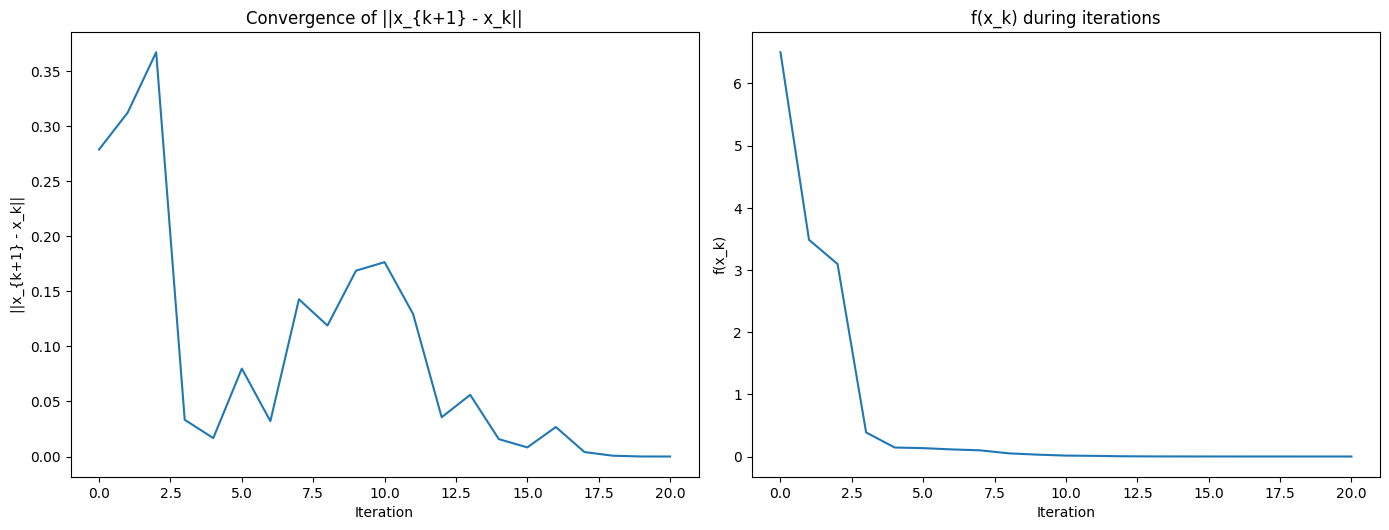

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

def gradient_f1(x):
    x1, x2 = x
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

def line_search(f, x_k, p_k, alpha=1e-4, beta=0.5):
    t = 1.0
    while f(x_k + t * p_k) > f(x_k) + alpha * t * np.dot(gradient_f1(x_k), p_k):
        t *= beta
    return t

def bfgs_optimizer(f, fprime, x0, max_iter=1000, tol=1e-6):
    x_k = x0
    H_k = np.eye(len(x0))  # Initial approximation of Hessian
    x_diff_norm = []  # For collecting ||x_{k+1} - x_k||
    f_x = []  # For collecting f(x_k)
    for _ in range(max_iter):
        g_k = fprime(x_k)
        if np.linalg.norm(g_k) < tol:
            break
        p_k = -np.dot(H_k, g_k)
        alpha = line_search(f, x_k, p_k)
        x_k_next = x_k + alpha * p_k
        s_k = x_k_next - x_k
        y_k = fprime(x_k_next) - g_k
        rho_k = 1 / np.dot(y_k, s_k)
        A = np.eye(len(s_k)) - rho_k * np.outer(s_k, y_k)
        B = np.eye(len(s_k)) - rho_k * np.outer(y_k, s_k)
        H_k = np.dot(np.dot(A, H_k), B) + rho_k * np.outer(s_k, s_k)
        x_diff_norm.append(np.linalg.norm(x_k_next - x_k))
        f_x.append(f(x_k))
        x_k = x_k_next
    return x_k, x_diff_norm, f_x

# Initial guess
x0 = np.array([0.5, 0.5])

# Run BFGS optimizer
x_opt, x_diff_norm, f_x = bfgs_optimizer(f1, gradient_f1, x0)

# Print the minimum value and the optimal points
print("Optimal solution:", x_opt)
print("Optimal value:", f1(x_opt))

# Plot convergence graphs for f1
plt.figure(figsize=(14, 10))

# Plot ||x_{k+1} - x_k||
plt.subplot(2, 2, 1)
plt.plot(x_diff_norm)
plt.xlabel('Iteration')
plt.ylabel('||x_{k+1} - x_k||')
plt.title('Convergence of ||x_{k+1} - x_k||')

# Plot f(x_k)
plt.subplot(2, 2, 2)
plt.plot(f_x)
plt.xlabel('Iteration')
plt.ylabel('f(x_k)')
plt.title('f(x_k) during iterations')

plt.tight_layout()
plt.show()

In [15]:
def bfgs_optimizer(f, fprime, x0, max_iter=1000, tol=1e-6):
    x_k = x0
    H_k = np.eye(len(x0))  # Initial approximation of Hessian
    x_diff_norm = []  # For collecting ||x_{k+1} - x_k||
    f_x = []  # For collecting f(x_k)
    iter_count = 0  # Initialize iteration count
    for iter_count in range(max_iter):
        g_k = fprime(x_k)
        if np.linalg.norm(g_k) < tol:
            break
        p_k = -np.dot(H_k, g_k)
        alpha = line_search(f, x_k, p_k)
        x_k_next = x_k + alpha * p_k
        s_k = x_k_next - x_k
        y_k = fprime(x_k_next) - g_k
        rho_k = 1 / np.dot(y_k, s_k)
        A = np.eye(len(s_k)) - rho_k * np.outer(s_k, y_k)
        B = np.eye(len(s_k)) - rho_k * np.outer(y_k, s_k)
        H_k = np.dot(np.dot(A, H_k), B) + rho_k * np.outer(s_k, s_k)
        x_diff_norm.append(np.linalg.norm(x_k_next - x_k))
        f_x.append(f(x_k))
        x_k = x_k_next
    return x_k, iter_count + 1, x_diff_norm, f_x  # Return iter_count + 1 to account for zero-based indexing


In [16]:
# Run BFGS optimizer
x_opt, num_iterations, x_diff_norm, f_x = bfgs_optimizer(f1, gradient_f1, x0)

# Print the number of iterations
print("Number of iterations:", num_iterations)

Number of iterations: 22


# Q2 - b

Optimal solution: [0.00365245 0.00036525 0.00156969 0.00156969]
Optimal value: 2.4740011286025507e-10


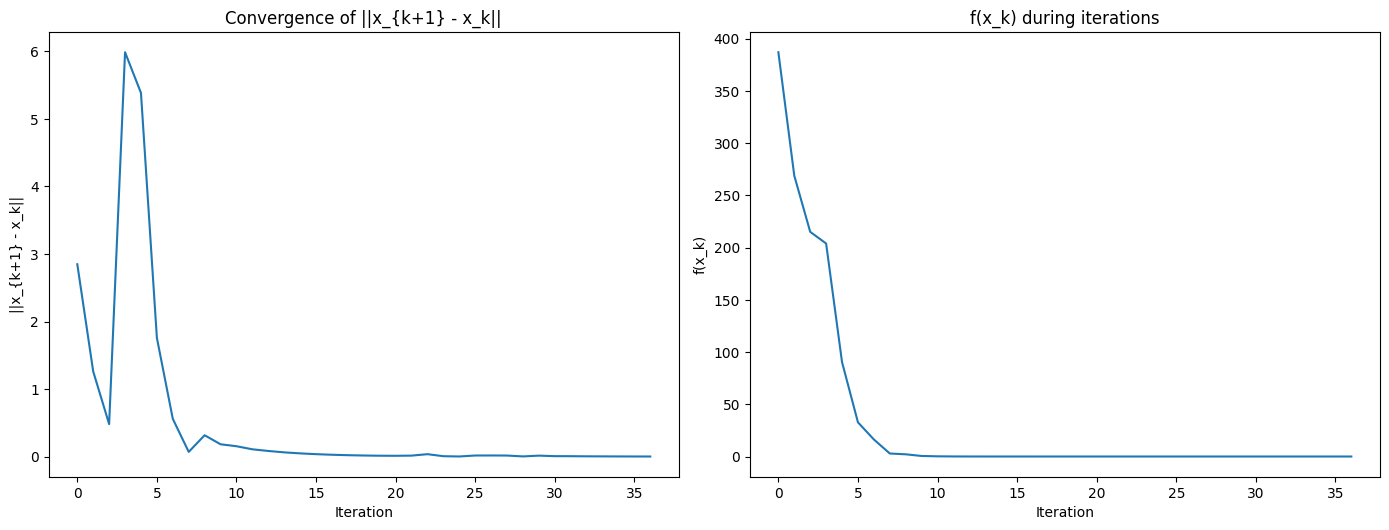

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def f2(x):
    x1, x2, x3, x4 = x
    return (x1 - 10*x2)**2 + 5*(x3 - x4)**2 + (x2 - 2*x3)**4 + 10*(x1 - x4)**4

def grad_f2(x):
    x1, x2, x3, x4 = x
    df_dx1 = 2*(x1 - 10*x2) + 40*(x1 - x4)**3
    df_dx2 = -20*(x1 - 10*x2) + 4*(x2 - 2*x3)**3
    df_dx3 = 10*(x3 - x4) - 8*(x2 - 2*x3)**3
    df_dx4 = -10*(x3 - x4) - 40*(x1 - x4)**3
    return np.array([df_dx1, df_dx2, df_dx3, df_dx4])

def line_search(f, x_k, p_k, alpha=1e-4, beta=0.5):
    t = 1.0
    while f(x_k + t * p_k) > f(x_k) + alpha * t * np.dot(grad_f2(x_k), p_k):
        t *= beta
    return t

def bfgs_optimizer(f, fprime, x0, max_iter=1000, tol=1e-6):
    x_k = x0
    H_k = np.eye(len(x0))  # Initial approximation of Hessian
    x_diff_norm = []  # For collecting ||x_{k+1} - x_k||
    f_x = []  # For collecting f(x_k)
    for _ in range(max_iter):
        g_k = fprime(x_k)
        if np.linalg.norm(g_k) < tol:
            break
        p_k = -np.dot(H_k, g_k)
        alpha = line_search(f, x_k, p_k)
        x_k_next = x_k + alpha * p_k
        s_k = x_k_next - x_k
        y_k = fprime(x_k_next) - g_k
        rho_k = 1 / np.dot(y_k, s_k)
        A = np.eye(len(s_k)) - rho_k * np.outer(s_k, y_k)
        B = np.eye(len(s_k)) - rho_k * np.outer(y_k, s_k)
        H_k = np.dot(np.dot(A, H_k), B) + rho_k * np.outer(s_k, s_k)
        x_diff_norm.append(np.linalg.norm(x_k_next - x_k))
        f_x.append(f(x_k))
        x_k = x_k_next
    return x_k, x_diff_norm, f_x

# Initial guess
x0 = np.array([1, 2, 2,2])

# Run BFGS optimizer
x_opt, x_diff_norm, f_x = bfgs_optimizer(f2, grad_f2, x0)

# Print the minimum value and the optimal points
print("Optimal solution:", x_opt)
print("Optimal value:", f2(x_opt))

# Plot convergence graphs for f2
plt.figure(figsize=(14, 10))

# Plot ||x_{k+1} - x_k||
plt.subplot(2, 2, 1)
plt.plot(x_diff_norm)
plt.xlabel('Iteration')
plt.ylabel('||x_{k+1} - x_k||')
plt.title('Convergence of ||x_{k+1} - x_k||')

# Plot f(x_k)
plt.subplot(2, 2, 2)
plt.plot(f_x)
plt.xlabel('Iteration')
plt.ylabel('f(x_k)')
plt.title('f(x_k) during iterations')

plt.tight_layout()
plt.show()


In [26]:
import numpy as np

def line_search(f, x_k, p_k, alpha=1e-4, beta=0.5):
    t = 1.0
    while f(x_k + t * p_k) > f(x_k) + alpha * t * np.dot(p_k, -p_k):
        t *= beta
    return t

def bfgs_optimizer(f, fprime, x0, max_iter=1000, tol=1e-6):
    x_k = x0
    H_k = np.eye(len(x0))  # Initial approximation of Hessian
    x_diff_norm = []  # For collecting ||x_{k+1} - x_k||
    f_x = []  # For collecting f(x_k)
    iter_count = 0  # Initialize iteration count
    for iter_count in range(max_iter):
        g_k = fprime(x_k)
        if np.linalg.norm(g_k) < tol:
            break
        p_k = -np.dot(H_k, g_k)
        alpha = line_search(f, x_k, p_k)
        x_k_next = x_k + alpha * p_k
        s_k = x_k_next - x_k
        y_k = fprime(x_k_next) - g_k
        rho_k = 1 / np.dot(y_k, s_k)
        A = np.eye(len(s_k)) - rho_k * np.outer(s_k, y_k)
        B = np.eye(len(s_k)) - rho_k * np.outer(y_k, s_k)
        H_k = np.dot(np.dot(A, H_k), B) + rho_k * np.outer(s_k, s_k)
        x_diff_norm.append(np.linalg.norm(x_k_next - x_k))
        f_x.append(f(x_k))
        x_k = x_k_next
    return x_k, iter_count + 1, x_diff_norm, f_x  # Return iter_count + 1 to account for zero-based indexing


In [27]:
# Run BFGS optimizer
x_opt, num_iterations, x_diff_norm, f_x = bfgs_optimizer(f2, grad_f2, x0)

# Print the minimum value, the optimal points, and the number of iterations
print("Optimal solution:", x_opt)
print("Optimal value:", f2(x_opt))
print("Number of iterations:", num_iterations)

Optimal solution: [0.00365245 0.00036525 0.00156969 0.00156969]
Optimal value: 2.4740011286025507e-10
Number of iterations: 38
